<a href="https://colab.research.google.com/github/SurbhiS19/G2M-cab-insights/blob/main/G2M_cab_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Required Libraries**

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import datetime

**Dataset to Dataframe**

In [237]:
df_cab = pd.read_csv('Cab_Data.csv')
df_city = pd.read_csv('City.csv')
df_customer = pd.read_csv('Customer_ID.csv')
df_transaction = pd.read_csv('Transaction_ID.csv')

**Describe Data**

In [238]:
# first few rows of all the datasets
print('Cab data \n', df_cab.head())
print('\n City data \n', df_city.head())
print('\n Customer data \n', df_customer.head())
print('\n Transaction data \n', df_transaction.head())

Cab data 
    Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  

 City data 
              City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247 

 Customer data 
    Customer ID Gender  Age  Income (USD/Month)
0        29290   Male

In [239]:
#describing the data statistics
print('Cab data \n', df_cab.describe())
print('City data \n', df_city.describe())
print('Customer data \n', df_customer.describe())
print('Transaction data \n', df_transaction.describe())

Cab data 
        Transaction ID  Date of Travel   KM Travelled  Price Charged  \
count    3.593920e+05   359392.000000  359392.000000  359392.000000   
mean     1.022076e+07    42964.067998      22.567254     423.443311   
std      1.268058e+05      307.467197      12.233526     274.378911   
min      1.000001e+07    42371.000000       1.900000      15.600000   
25%      1.011081e+07    42697.000000      12.000000     206.437500   
50%      1.022104e+07    42988.000000      22.440000     386.360000   
75%      1.033094e+07    43232.000000      32.960000     583.660000   
max      1.044011e+07    43465.000000      48.000000    2048.030000   

        Cost of Trip  
count  359392.000000  
mean      286.190113  
std       157.993661  
min        19.000000  
25%       151.200000  
50%       282.480000  
75%       413.683200  
max       691.200000  
City data 
                City   Population      Users
count            20           20         20
unique           20           20         2

In [240]:
print('Cab data \n', df_cab.info())
print('City data \n', df_city.info())
print('Customer data \n', df_customer.info())
print('Transaction data \n', df_transaction.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
Cab data 
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
City data 
 None
<class 'pandas.core.frame.DataFra

**Check for null**

In [241]:
print('Cab data \n', df_cab.isnull().sum())
print('\n City data \n', df_city.isnull().sum())
print('\n Customer data \n', df_customer.isnull().sum())
print('\n Transaction data \n', df_transaction.isnull().sum())

Cab data 
 Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

 City data 
 City          0
Population    0
Users         0
dtype: int64

 Customer data 
 Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

 Transaction data 
 Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64


No Null values in all the datasets

**Checking Number of rows and columns in Datasets**

In [242]:
print('Cab data shape', df_cab.shape)
print('City data shape', df_city.shape)
print('Customer data shape', df_customer.shape)
print('Transaction data shape', df_transaction.shape)

Cab data shape (359392, 7)
City data shape (20, 3)
Customer data shape (49171, 4)
Transaction data shape (440098, 3)


**Converting Date to yyyy-mm-dd format**

In [243]:
df_cab = df_cab.rename(columns = {'Date of Travel': 'Date'})
df_cab['Date'] = df_cab['Date'].apply(lambda x: datetime.date(1899, 12, 30)+datetime.timedelta(days=x))
df_cab['Date'] = pd.to_datetime(df_cab['Date'])
df_cab.head()

,Transaction ID,Date,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


**Merge Data**

In [244]:
#Merging cab data with transaction data with Transaction_ID as primary key and then mergin with customer and city data
df_merged= df_cab.merge(df_transaction, on= 'Transaction ID').merge(df_customer, on ='Customer ID').merge(df_city, on = 'City')
#Sorting data based on date
df_merged = df_merged.sort_values(by='Date', ascending=True).reset_index(drop=True)
print(df_merged.head())
print('shape of merged data',df_merged.shape)

   Transaction ID       Date     Company           City  KM Travelled  \
0        10000429 2016-01-02  Yellow Cab      BOSTON MA         15.15   
1        10000525 2016-01-02  Yellow Cab     CHICAGO IL          2.18   
2        10001234 2016-01-02  Yellow Cab     SEATTLE WA         39.60   
3        10001311 2016-01-02  Yellow Cab  WASHINGTON DC         34.65   
4        10000927 2016-01-02  Yellow Cab    NEW YORK NY         34.56   

   Price Charged  Cost of Trip  Customer ID Payment_Mode Gender  Age  \
0         342.62      205.4340        57474         Card   Male   34   
1          51.47       26.4216         4551         Cash   Male   19   
2        1119.67      541.7280        38146         Cash   Male   36   
3         707.94      474.0120        53048         Card   Male   23   
4        1121.11      485.2224         1808         Cash   Male   59   

   Income (USD/Month)   Population      Users  
0               16558     248,968     80,021   
1                6316   1,955,13

In [245]:
#Rearranging columns
df_merged=pd.DataFrame(df_merged, columns=["Date","Company","Price Charged","Cost of Trip","KM Travelled","Payment_Mode","Customer ID","Transaction ID","Gender","Age","Income (USD/Month)","City","Users","Population"])
# df_merged = df_merged.reindex(columns=change_columns)
print(df_merged.isnull().sum())
df_merged.drop_duplicates(subset=['Transaction ID'])
df_merged.head()

Date                  0
Company               0
Price Charged         0
Cost of Trip          0
KM Travelled          0
Payment_Mode          0
Customer ID           0
Transaction ID        0
Gender                0
Age                   0
Income (USD/Month)    0
City                  0
Users                 0
Population            0
dtype: int64


,Date,Company,Price Charged,Cost of Trip,KM Travelled,Payment_Mode,Customer ID,Transaction ID,Gender,Age,Income (USD/Month),City,Users,Population
0,2016-01-02,Yellow Cab,342.62,205.4340,15.15,Card,57474,10000429,Male,34,16558,BOSTON MA,"80,021","248,968"
1,2016-01-02,Yellow Cab,51.47,26.4216,2.18,Cash,4551,10000525,Male,19,6316,CHICAGO IL,"164,468","1,955,130"
2,2016-01-02,Yellow Cab,1119.67,541.7280,39.60,Cash,38146,10001234,Male,36,6577,SEATTLE WA,"25,063","671,238"
3,2016-01-02,Yellow Cab,707.94,474.0120,34.65,Card,53048,10001311,Male,23,31566,WASHINGTON DC,"127,001","418,859"
4,2016-01-02,Yellow Cab,1121.11,485.2224,34.56,Cash,1808,10000927,Male,59,18999,NEW YORK NY,"302,149","8,405,837"


**Calculate total profit per km**

In [246]:
df_merged['Profit']=(df_merged['Price Charged']-df_merged['Cost of Trip'])/df_merged['KM Travelled']
df_merged['Year'] = df_merged['Date'].dt.year
df_merged['Month'] = df_merged['Date'].dt.month

**Removing space from column names**

In [247]:
for col in df_merged.columns:
    if ' ' in col:
        df_merged = df_merged.rename(columns={col:col.replace(' ','_')})

**Separating Pink and Yellow Cab Data for further Analysis**

In [248]:
PinkCab = df_merged[df_merged['Company']=='Pink Cab']
YellowCab = df_merged[df_merged['Company']=='Yellow Cab']
del PinkCab['Company']
del YellowCab['Company']
PinkCab.head()

,Date,Price_Charged,Cost_of_Trip,KM_Travelled,Payment_Mode,Customer_ID,Transaction_ID,Gender,Age,Income_(USD/Month),City,Users,Population,Profit,Year,Month
8,2016-01-02,71.57,48.840,4.44,Cash,22557,10000163,Male,38,8808,PHOENIX AZ,"6,133","943,999",5.119369,2016,1
9,2016-01-02,114.15,89.775,8.55,Card,22469,10000164,Male,37,4378,PHOENIX AZ,"6,133","943,999",2.850877,2016,1
14,2016-01-02,498.60,349.248,32.64,Card,533,10000149,Male,52,15974,NEW YORK NY,"302,149","8,405,837",4.575735,2016,1
19,2016-01-02,851.25,438.016,37.76,Card,8927,10000092,Male,19,17197,LOS ANGELES CA,"144,132","1,595,037",10.943697,2016,1
30,2016-01-02,598.43,406.232,35.02,Card,4289,10000041,Male,19,28719,CHICAGO IL,"164,468","1,955,130",5.488235,2016,1


Following visualizations has been performed:
1. Data Correlation for both the cabs
2. Month-wise profit distribution of both cabs
3. Year-wise profit distribution of both cabs
4. City-wise profit distribution of both cabs
5. Annual profit rate
6. Price vs Distance and Cost vs Distance comparison 
7. Gender and Year wise cab usage
8. Age and year wise can usage
9. Income wise Cab usage

Text(0.5, 1.0, 'Yellow Cab Correlation')

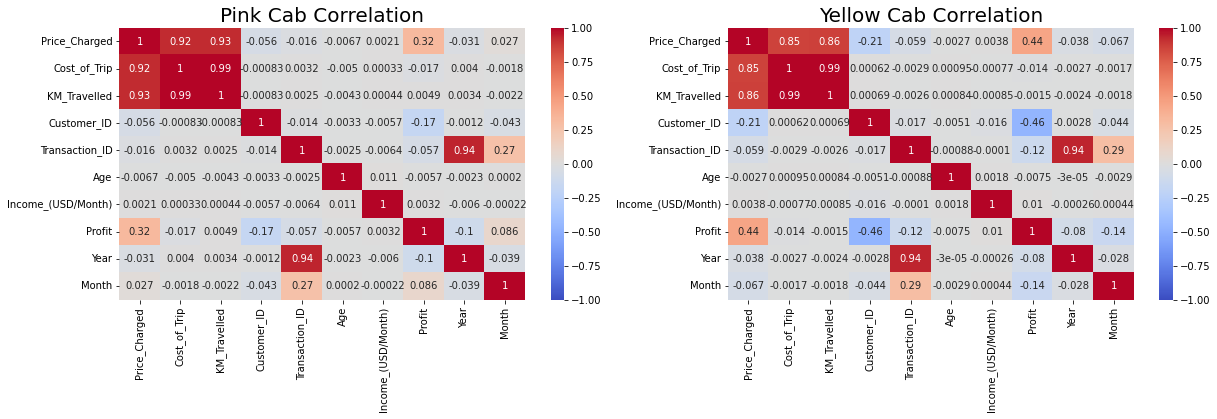

<Figure size 1440x720 with 0 Axes>

In [249]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
# Corr = PinkCab.corr()
plt.figure(figsize=(20,10))
sns.heatmap(PinkCab.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm', ax=ax1)
ax1.set_title('Pink Cab Correlation', fontsize=20)

sns.heatmap(YellowCab.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm', ax=ax2)
ax2.set_title('Yellow Cab Correlation', fontsize=20)


There is a strong correlation between cost, price and KM_travelled. There is also a strong correlation between year and transactions


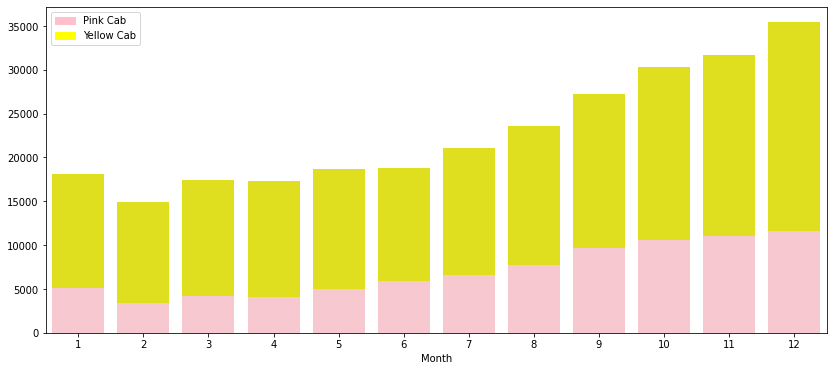

In [250]:
PPM_pink = PinkCab.groupby(['Month']).Profit.count()
PPM_yellow = YellowCab.groupby(['Month']).Profit.count()

plt.figure(figsize=(14,6))
bar1 = sns.barplot(x=PPM_yellow.index, y=PPM_yellow.values, color='yellow')
bar2 = sns.barplot(x=PPM_pink.index,  y=PPM_pink.values, color='pink')
# add legend
top_bar = mpatches.Patch(color='pink', label='Pink Cab')
bottom_bar = mpatches.Patch(color='yellow', label='Yellow Cab')
plt.legend(handles=[top_bar, bottom_bar])
plt.show()

Yellow Cab has higher monthly profit

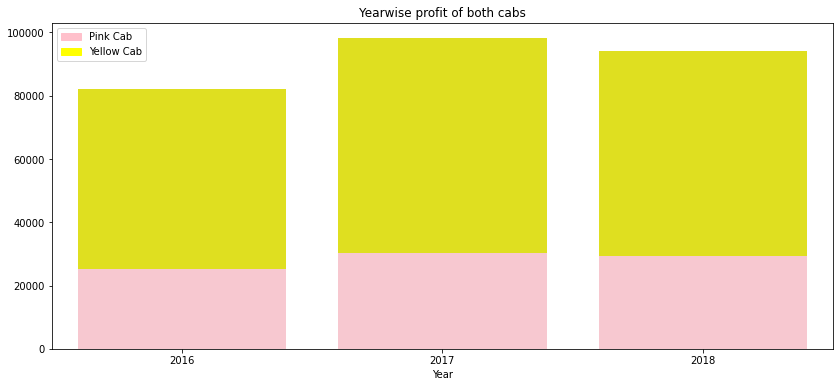

In [251]:
PPM_pink = PinkCab.groupby(['Year']).Profit.count()
PPM_yellow = YellowCab.groupby(['Year']).Profit.count()

plt.figure(figsize=(14,6))
bar1 = sns.barplot(x=PPM_yellow.index, y=PPM_yellow.values, color='yellow')
bar2 = sns.barplot(x=PPM_pink.index,  y=PPM_pink.values, color='pink')
# add legend
top_bar = mpatches.Patch(color='pink', label='Pink Cab')
bottom_bar = mpatches.Patch(color='yellow', label='Yellow Cab')
plt.legend(handles=[top_bar, bottom_bar])
plt.title('Yearwise profit of both cabs')
plt.show()

Yellow Cab has higher yearly profit

**Profit Per city**

City
ATLANTA GA         1762
AUSTIN TX          1868
BOSTON MA          5186
CHICAGO IL         9361
DALLAS TX          1380
DENVER CO          1394
LOS ANGELES CA    19865
MIAMI FL           2002
NASHVILLE TN       1841
NEW YORK NY       13967
ORANGE COUNTY      1513
PHOENIX AZ          864
PITTSBURGH PA       682
SACRAMENTO CA      1334
SAN DIEGO CA      10672
SEATTLE WA         2732
SILICON VALLEY     3797
TUCSON AZ           799
WASHINGTON DC      3692
Name: Profit, dtype: int64


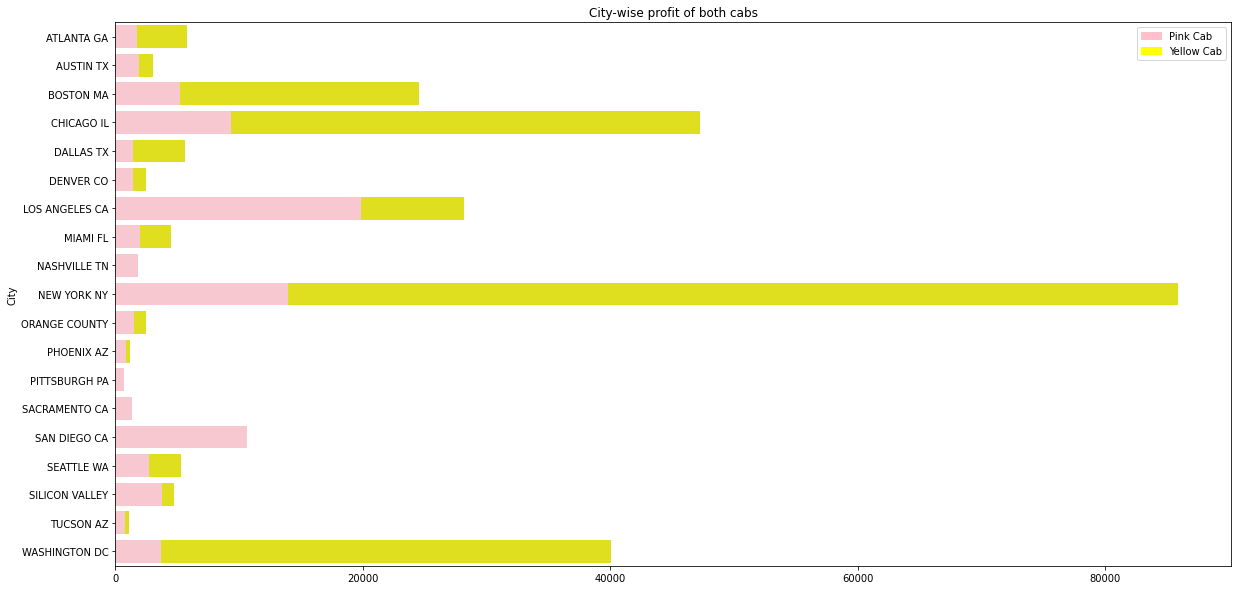

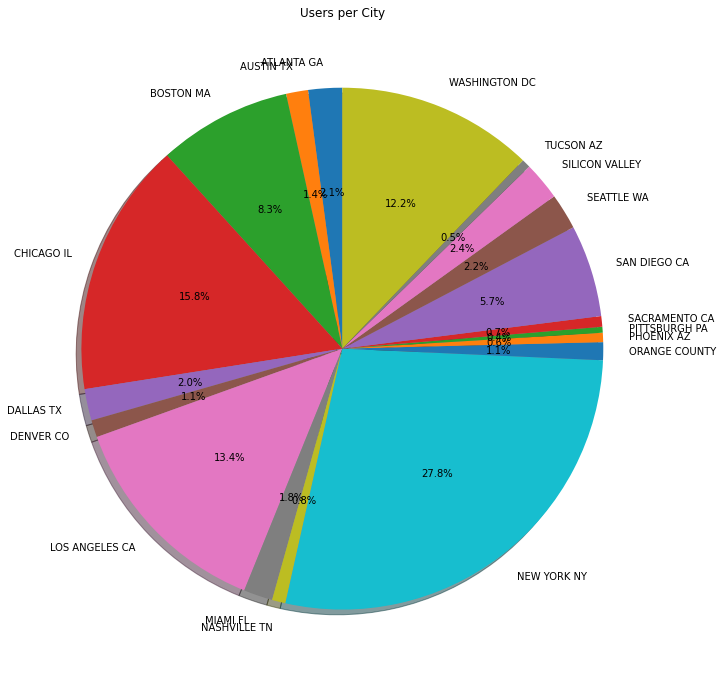

In [266]:
PPM_pink = PinkCab.groupby(['City']).Profit.count()
PPM_yellow = YellowCab.groupby(['City']).Profit.count()
print(PPM_pink)
plt.figure(figsize=(20,10))
bar1 = sns.barplot(x=PPM_yellow.values, y=PPM_yellow.index, color='yellow')
bar2 = sns.barplot(x=PPM_pink.values,  y=PPM_pink.index, color='pink')
# add legend
top_bar = mpatches.Patch(color='pink', label='Pink Cab')
bottom_bar = mpatches.Patch(color='yellow', label='Yellow Cab')
plt.legend(handles=[top_bar, bottom_bar])
plt.title('City-wise profit of both cabs')
plt.show()

UsersPerCity = df_merged.groupby('City').Users.count()
print('\n')
figp, axp = plt.subplots(figsize=(22,12))
axp.pie(UsersPerCity.values , labels=UsersPerCity.index, autopct='%1.1f%%',shadow=True, startangle=90,)
# axp.axis('equal')
plt.title('Users per City')
plt.show()

Yellow Cab has higher profit share in big cities like Newyork, Boston, Chicago, Washington DC, Atlanta whereas Pink Cab has higher profit in small cities with LA as an exception

Text(0.5, 1.0, 'Profit Distribution')

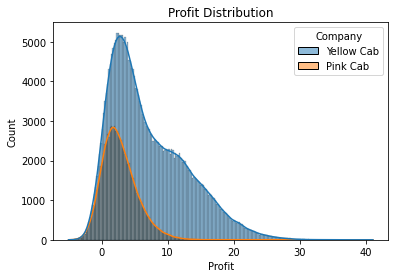

In [253]:
sns.histplot(data=df_merged , x='Profit' , kde = True , hue="Company")
plt.title('Profit Distribution')


Annual Profit Rate of Cab Market
Company  Pink Cab  Yellow Cab  Cab Market
Year                                     
2016     1.225389    2.508569    2.250049
2017     1.190694    2.516466    2.244558
2018     0.946186    2.139722    1.893665


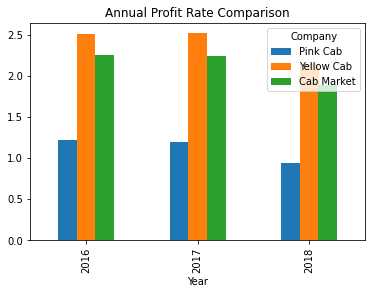

In [254]:
Annual_Profit_Rate = df_merged.groupby(['Year','Company']).Profit.sum().unstack()/df_merged.groupby(['Year','Company']).Cost_of_Trip.sum().unstack()*100
Cab_Annual_PR = df_merged.groupby(['Year']).Profit.sum()/df_merged.groupby(['Year']).Cost_of_Trip.sum()*100
Annual_Profit_Rate['Cab Market'] = Cab_Annual_PR
print("Annual Profit Rate of Cab Market")
print(Annual_Profit_Rate)
ax = Annual_Profit_Rate.plot(kind='bar',stacked = False, title = 'Annual Profit Rate Comparison')
plt.show()

Yellow Cab has higher contribution to annual profit rate every year

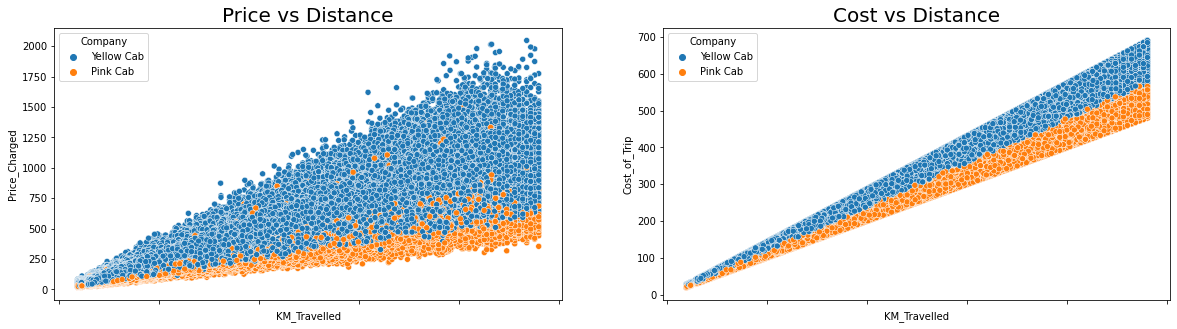

In [255]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
sns.scatterplot(data = df_merged, x='KM_Travelled', y='Price_Charged', hue='Company', ax=ax1)
ax1.set_title('Price vs Distance', fontsize=20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=15)
sns.scatterplot(data = df_merged, x='KM_Travelled', y='Cost_of_Trip', hue='Company', ax=ax2)
ax2.set_title('Cost vs Distance', fontsize=20)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, fontsize=15)
plt.show()

Price charged for yellow cab per ride is higher as compared to pink cab. But the cost of trip is not hugely different

Year     2016   2017   2018
Gender                     
Female  10873  13475  13132
Male    14207  16846  16178
Year     2016   2017   2018
Gender                     
Female  33861  41785  40354
Male    48378  56404  53899


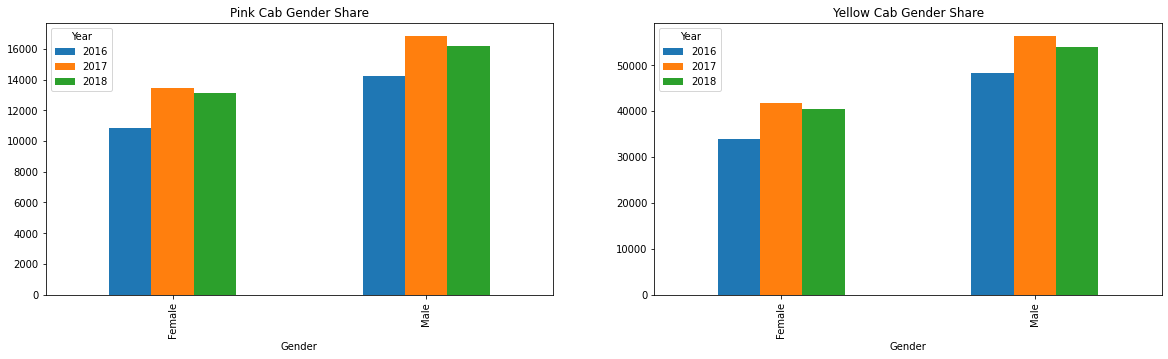

In [256]:
Pink_Gender=PinkCab.groupby(['Gender','Year']).Users.count().unstack()
Yellow_Gender=YellowCab.groupby(['Gender','Year']).Users.count().unstack()

print(Pink_Gender)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
Pink_Gender.plot(kind='bar',stacked = False, title = 'Pink Cab Gender Share',ax=ax1)

print(Yellow_Gender)
Yellow_Gender.plot(kind='bar',stacked = False, title = 'Yellow Cab Gender Share',ax=ax2)
plt.show()



Both the genders prefer yellow cab and has highest travel rates in 2017

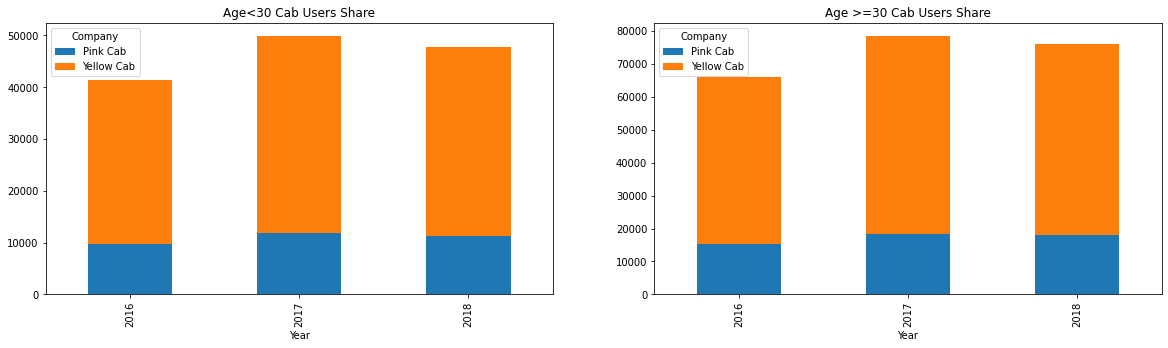

In [257]:
Young_Age=df_merged[df_merged['Age']<30].groupby(['Year','Company']).Users.count().unstack()
Old_Age=df_merged[df_merged['Age']>=30].groupby(['Year','Company']).Users.count().unstack()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
Young_Age.plot(kind='bar',stacked = True, title = 'Age<30 Cab Users Share',ax=ax1)

Old_Age.plot(kind='bar',stacked = True, title = 'Age >=30 Cab Users Share',ax=ax2)
plt.show()



Young as well old population both prefer yellow cab

Company  Pink Cab  Yellow Cab
Year                         
2016         9695       32197
2017        11816       38293
2018        11571       36884
Company  Pink Cab  Yellow Cab
Year                         
2016        15385       50042
2017        18505       59896
2018        17739       57369


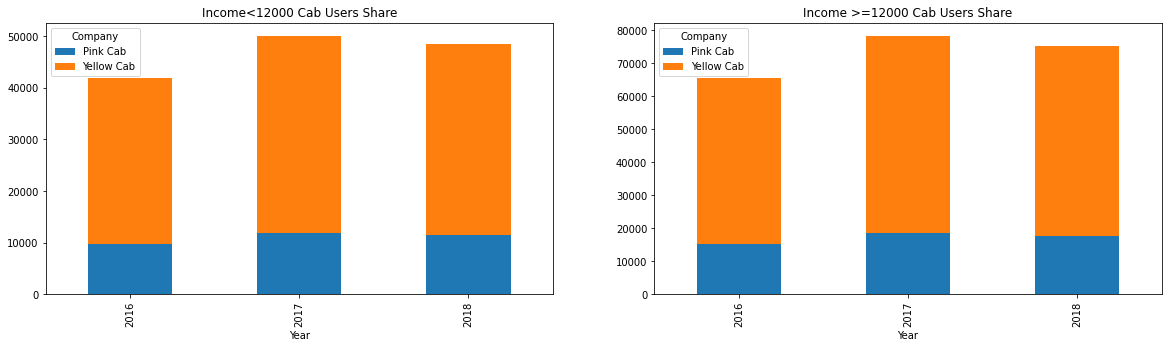

In [258]:
Low_Income=df_merged[df_merged['Income_(USD/Month)']<12000].groupby(['Year','Company']).Users.count().unstack()
High_Income=df_merged[df_merged['Income_(USD/Month)']>=12000].groupby(['Year','Company']).Users.count().unstack()
print(Low_Income)
print(High_Income)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
Low_Income.plot(kind='bar',stacked = True, title = 'Income<12000 Cab Users Share',ax=ax1)

High_Income.plot(kind='bar',stacked = True, title = 'Income >=12000 Cab Users Share',ax=ax2)
plt.show()

All the income groups prefer yellow cab

Month
1      5057
2      3375
3      4223
4      4083
5      4960
6      5877
7      6590
8      7739
9      9658
10    10576
11    11005
12    11568
Name: Users, dtype: int64


Text(0.5, 1.0, 'Monthly Cab Users')

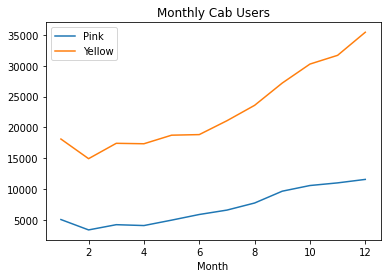

In [259]:
Pink_Month=PinkCab.groupby(['Month']).Users.count()
Yellow_Month=YellowCab.groupby(['Month']).Users.count()

print(Pink_Month)
Pink_Month.plot(kind='line')
Yellow_Month.plot(kind='line')
plt.legend(['Pink','Yellow'])
plt.title('Monthly Cab Users')
# print(Yellow_Gender)
# Yellow_Gender.plot(kind='bar',stacked = False, title = 'Yellow Cab Gender Share',ax=ax2)
# plt.show()


Yellow cab is better based on every hypothesis considering profit, gender, age and income wise preference, yearly, monthly profit and all the other parameters.

**Hence, Investment should be done in Yellow Cab.**